# Lab 5 | EDA & Visualization

In [67]:
# Task A

import pandas as pd

df = pd.read_csv("../data/students.csv")
df.head()

,student_id,age,gpa,gender,major,year
0,1,14,NaN,F,Economics,freshman
1,2,17,2.92,M,History,senior
2,3,17,2.97,F,Physics,senior
3,4,16,2.76,F,Physics,junior
4,5,16,2.24,M,Chemistry,junior


In [68]:
# Task B

print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  100 non-null    int64  
 1   age         100 non-null    int64  
 2   gpa         90 non-null     float64
 3   gender      100 non-null    object 
 4   major       95 non-null     object 
 5   year        100 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB
None
student_id     0
age            0
gpa           10
gender         0
major          5
year           0
dtype: int64


# Which column has the most missing values and why might that be?
GPA has the most missing values. This could be for a variety of reasons. If this data was obtained through self-reporting, students may not want to report their GPA if they aren't satisfied with it. Another possibility is that the students missing their GPA are all freshmen. Since they haven't completed their full year yet, they will not have a GPA.

In [69]:
# Task C

summary = pd.DataFrame({
    "stat": ["count", "mean", "median", "variance", "std_dev", "min", "max"],
    "age stats summary": [len(df["age"].dropna()), df["age"].mean(), df["age"].median(), df["age"].var(), df["age"].std(), df["age"].min(), df["age"].max()],
    "gpa stats summary": [len(df["gpa"].dropna()), df["gpa"].mean(), df["gpa"].median(), df["gpa"].var(), df["gpa"].std(), df["gpa"].min(), df["gpa"].max()],
})

summary

,stat,age stats summary,gpa stats summary
0,count,100.000000,90.000000
1,mean,16.130000,2.624667
2,median,16.000000,2.665000
3,variance,1.892020,0.227432
4,std_dev,1.375507,0.476898
5,min,14.000000,1.630000
6,max,18.000000,3.930000


<Axes: xlabel='gpa', ylabel='Count'>

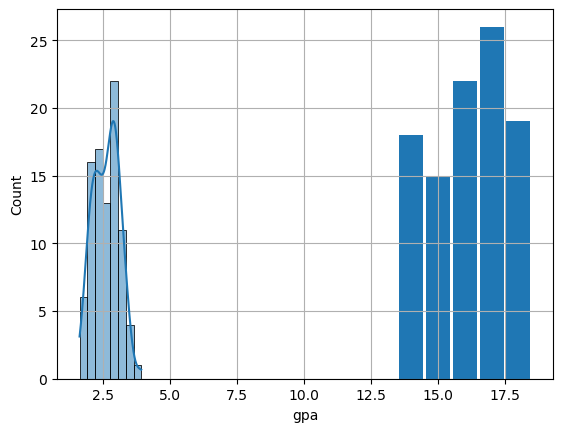

In [70]:
# Task D
import seaborn as sns

plt = df["age"].hist(bins=range(14,20), align = "left", rwidth=0.9)

sns.histplot(df["gpa"], kde=True)


# Observations on age and GPA distributions
One interesting feature about the GPA distribution is that it appears to be bimodal. There are two significant peaks: one at about 2.25 and another at about 3.0. One interesting feature about the age distribution is that there are much more 17-year-olds compared to other ages. This is odd because one would expect ages across a school to be mostly uniform; class sizes by grade tend to be the same.

Correlation coefficient between age and GPA: r = 0.8786075344584666


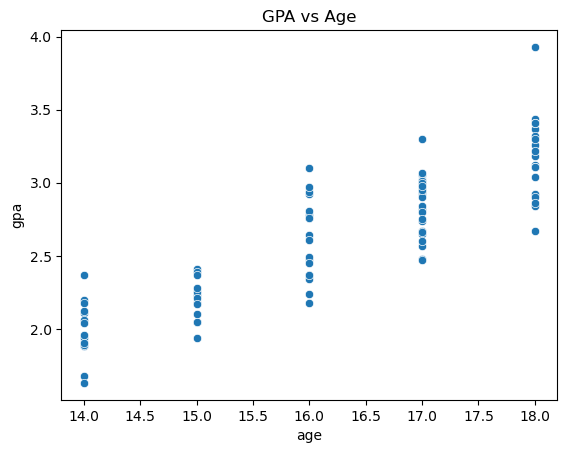

In [71]:
# Task E

scatterplot = sns.scatterplot(x="age", y="gpa", data=df)
scatterplot.set_title("GPA vs Age")
r = df["age"].corr(df["gpa"])
print(f"Correlation coefficient between age and GPA: r = {r}")

# Interpretation of plot and correlation coefficient
Looking at the plot, one can tell that there is strong positive correlation between age and GPA. This is confirmed by the fact that the correlation coefficient r is about 0.88, indicating strong positive correlation. That means older students can be expected to have higher GPAs and vice versa.

In [87]:
# Task F

df_cleaned = df.copy()
df_cleaned["major"] = df["major"].str.strip().str.lower()
df_cleaned.dropna(subset=["major"], inplace=True)

df_cleaned.to_csv("../data/students_clean.csv", index=False)
